In [1]:
import netCDF4
from google.colab import files
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
files.upload()

Saving ca_subCA_das_2020010103.nc to ca_subCA_das_2020010103.nc


dict_keys(['time', 'depth', 'lat', 'lon', 'temp', 'salt', 'u', 'v', 'zeta'])
150.0


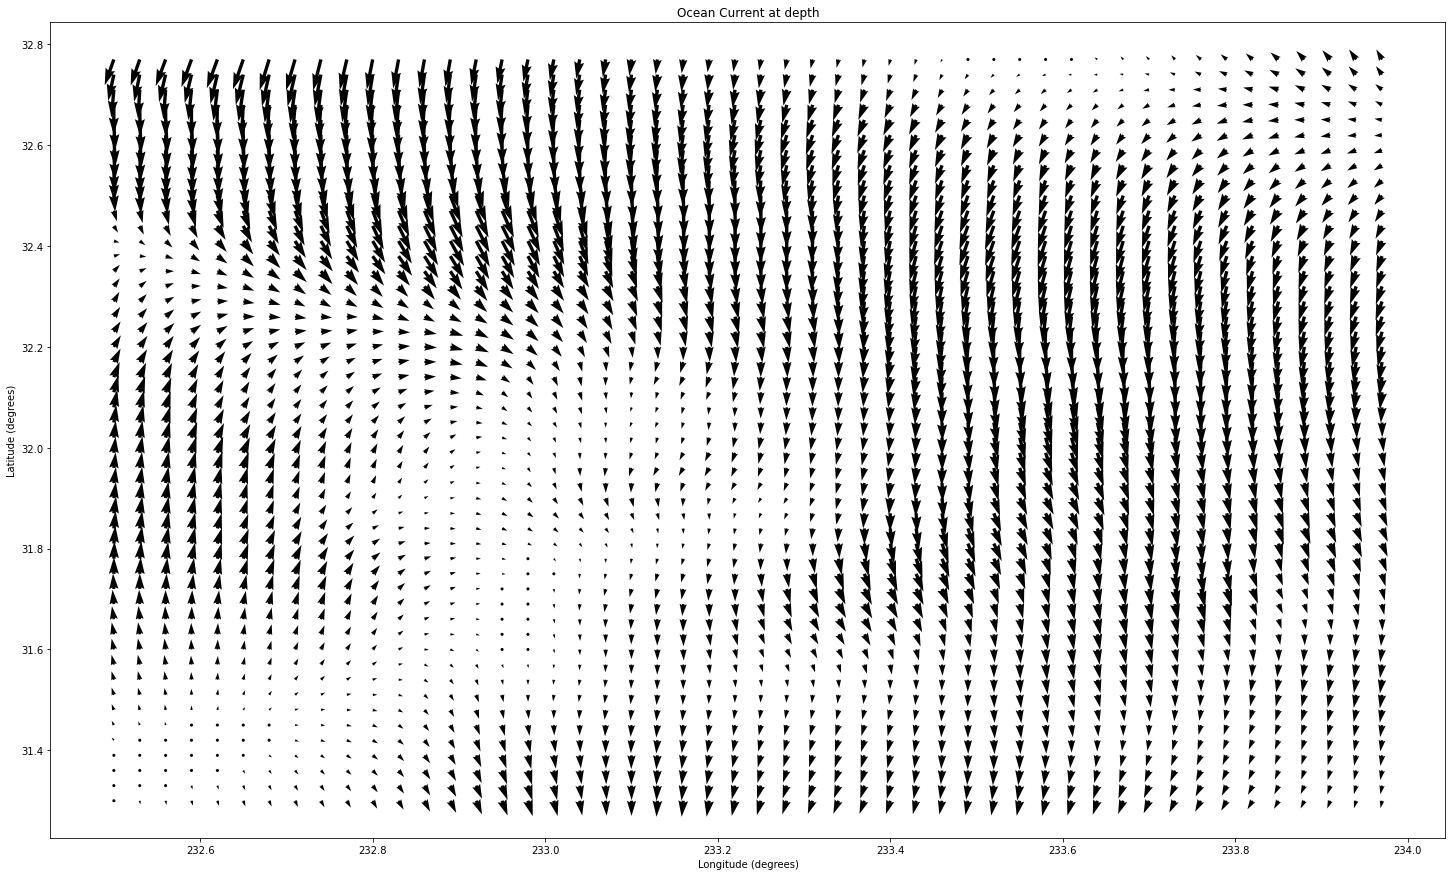

In [16]:
nc = netCDF4.Dataset('ca_subCA_das_2020010103.nc') #Change to match dataset name

print(nc.variables.keys())

#Store variables from nc file locally
longitude = nc.variables['lon']
latitude = nc.variables['lat']
depth = nc.variables['depth']
u = nc.variables['u']
v = nc.variables['v']
time = nc.variables['time']


#Working at the depth indexed at position 8
depths = depth[8]
print(depths)


#Sets size for for the empty veloU and veloV
m,n = 50,50

#Makes the longitute and latitude the same size must be one greater then m,n
for i in range(0,m+1):
  lon = longitude[:i]
  lat = latitude[:i]

#Initializes veloU and veloV with zeros
veloU = np.zeros([m,n])
veloV = np.zeros([m,n])

figs = plt.figure(figsize = (25, 15))
axs = figs.gca()


for i in range(0,m):
  for j in range(0,n):

    veloU[i][j] = u[0][8][i][j]
    veloV[i][j] = v[0][8][i][j]

axs.quiver(lon,lat,veloU,veloV)
axs.set_xlabel('Longitude (degrees)')
axs.set_ylabel('Latitude (degrees)')
axs.set_title('Ocean Current at depth')
figs.savefig('2DOceanCurrentDirection.jpg')

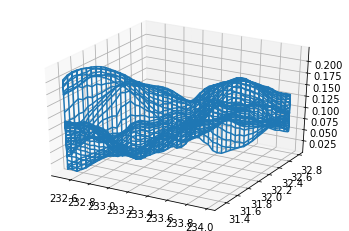

In [19]:
from matplotlib import cm
R = np.sqrt(veloU **2 + veloV** 2)
Z= np.sin(R)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, )

#surf = ax.plot_surface(lon,lat, Z,rstride=1, cstride=1,
#               cmap='winter', edgecolor='none' )

surf = ax.plot_wireframe(lon,lat,Z)
fig.savefig('fig1.png',dpi=300)